In [28]:
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('twitter_with_label.csv')
tok = RegexpTokenizer(r'[a-zA-Z0-9]+')
vector = CountVectorizer(stop_words='english',
                         ngram_range = (1,3),
                         tokenizer = tok.tokenize)
text = vector.fit_transform(data['text'])
#Splitting trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text, data['rating'], test_size=0.25, random_state=11)
#Training the model
model = LogisticRegression() #MultinomialNB()#LinearSVC()
start = time.time()
model.fit(X_train, Y_train)
end = time.time()
#Caluclating the accuracy score of the model
pred = model.predict(X_test)
accscore = metrics.accuracy_score(pred, Y_test)
#print("OH MY GOD, let check the Accuracuy Score: ",accscore)
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
print(classification_report(Y_test, pred))
print("Accuracy Score:", model.score(X_test,Y_test))

C:\Users\andy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The execution time of this model is 1.50 seconds

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1263
           4       0.71      0.74      0.73      1237

    accuracy                           0.72      2500
   macro avg       0.72      0.72      0.72      2500
weighted avg       0.72      0.72      0.72      2500

Accuracy Score: 0.7236


In [59]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from time import time
import pandas as pd
import numpy as np
import math
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
#============================================
# perform a pre-selection
#============================================
data = pd.read_csv('twitter_with_label.csv')
tok = RegexpTokenizer(r'[a-zA-Z0-9]+')
vector = CountVectorizer(stop_words='english',
                         ngram_range = (1,3),
                         tokenizer = tok.tokenize)
text = vector.fit_transform(data['text'])
X_train, X_test, Y_train, Y_test = train_test_split(text, data['rating'], test_size=0.25, random_state=11)


C:\Users\andy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [60]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from time import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [61]:
##+======================================

classifiers = [

    MultinomialNB(), 
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier()
]

models = []
outcome = pd.DataFrame(columns = models)
results = []

num = len(classifiers)
i =0
for model in classifiers[:num]:
    i+=1
    start = time()
    modelname = model.__class__.__name__
    print(modelname)
    model.fit(X_train ,Y_train)
    train_time = time() - start
    
    start = time()
    Y_pred = model.predict(X_test) 
    predict_time = time()-start
         
    outcome.loc[i,'Model Name'] = modelname
    outcome.loc[i,'Training Time'] = train_time
    outcome.loc[i,'Prediction time'] = predict_time
    outcome.loc[i,'F1 score'] = f1_score(Y_test, Y_pred, average='weighted')
    outcome.loc[i, 'Train Accuracy'] = round(model.score(X_train, Y_train) * 100, 4)  #xtrain_pca   
    outcome.loc[i,'Test Accuracy'] =  round(model.score(X_test, Y_test) * 100, 4)

    print(" Accuracy Score:", model.score(X_test,Y_test))
    print("\n")

     
# display the result    
outcome

MultinomialNB
 Accuracy Score: 0.7064


LogisticRegression
 Accuracy Score: 0.7236


KNeighborsClassifier
 Accuracy Score: 0.53


RandomForestClassifier
 Accuracy Score: 0.69


AdaBoostClassifier
 Accuracy Score: 0.6576


DecisionTreeClassifier
 Accuracy Score: 0.6644


GradientBoostingClassifier
 Accuracy Score: 0.6828




,Model Name,Training Time,Prediction time,F1 score,Train Accuracy,Test Accuracy
1,MultinomialNB,0.066596,0.008014,0.705928,99.3867,70.64
2,LogisticRegression,3.111491,0.000990,0.723550,99.6667,72.36
3,KNeighborsClassifier,0.003006,0.660303,0.410769,57.4800,53.00
4,RandomForestClassifier,262.327846,0.579094,0.689944,99.9733,69.00
5,AdaBoostClassifier,111.164517,0.038001,0.638110,67.0800,65.76
6,DecisionTreeClassifier,21.603999,0.005000,0.663659,99.9733,66.44
7,GradientBoostingClassifier,266.777441,0.011356,0.671615,71.4400,68.28


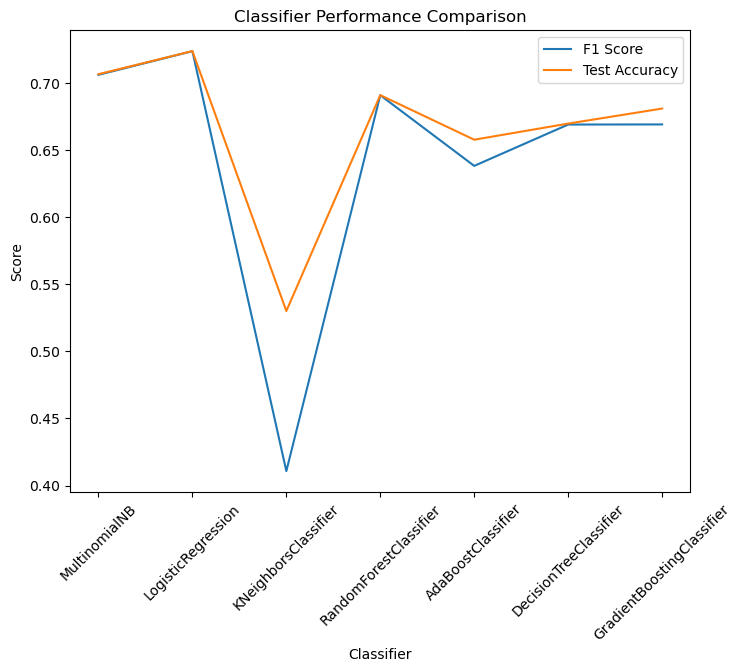

In [58]:
import matplotlib.pyplot as plt
results =models_compare

# Plot the results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(results['Model Name'], results['F1 score'], label='F1 Score')
ax.plot(results['Model Name'], results['Test Accuracy'] /100, label='Test Accuracy')
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classifier Performance Comparison')
ax.legend()
plt.xticks(rotation=45)
plt.show()